# CLUSTERING

In [4]:
import numpy as np
import pandas as pd
import csv
import seaborn
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
acc = pd.read_csv('accidents.csv')

In [5]:
acc=acc.drop(['ID','Start_Lat','Start_Lng','End_Lat','Start_Time','End_Lng','End_Time','Precipitation(in)','Description','Number','Street','Side','City','Country','State','Zipcode','County','Timezone','Airport_Code','Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Wind_Direction','Amenity','Bump','Crossing','Give_Way','Junction','Traffic_Calming','Traffic_Signal','No_Exit','Railway','Turning_Loop','Roundabout','Station','Stop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1)

In [6]:
acc 

,Severity,Distance(mi),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition
0,3,3.230,58.0,29.76,10.0,10.4,Light Rain
1,2,0.747,91.0,29.68,10.0,NaN,Light Rain
2,2,0.055,97.0,29.70,10.0,NaN,Overcast
3,2,0.123,55.0,29.65,10.0,NaN,Overcast
4,3,0.500,93.0,29.69,10.0,10.4,Light Rain
...,...,...,...,...,...,...,...
2845337,2,0.543,40.0,28.92,10.0,13.0,Fair
2845338,2,0.338,73.0,29.39,10.0,6.0,Fair
2845339,2,0.561,64.0,29.74,10.0,10.0,Partly Cloudy
2845340,2,0.772,81.0,29.62,10.0,8.0,Fair


In [7]:
acc['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [8]:
acc=acc.drop('Weather_Condition',axis=1)

In [9]:
print(acc['Severity'].value_counts())


2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64


In [10]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Severity         int64  
 1   Distance(mi)     float64
 2   Humidity(%)      float64
 3   Pressure(in)     float64
 4   Visibility(mi)   float64
 5   Wind_Speed(mph)  float64
dtypes: float64(5), int64(1)
memory usage: 130.2 MB


<AxesSubplot: xlabel='Severity', ylabel='count'>

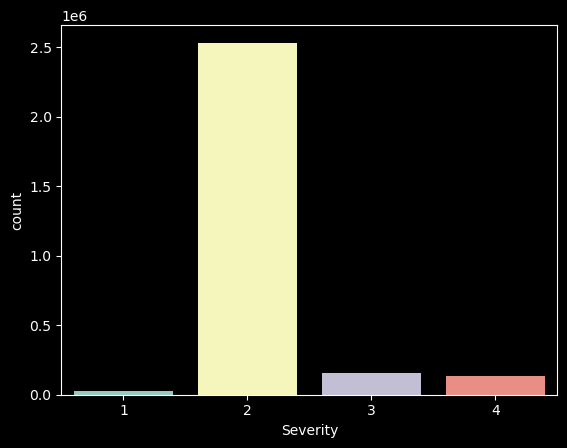

In [11]:
seaborn.countplot(x='Severity',data=acc)

In [12]:
acc=acc.dropna() 

In [13]:
myVal=acc['Severity']

In [14]:
myVal

0          3
4          3
5          2
6          2
7          2
          ..
2845337    2
2845338    2
2845339    2
2845340    2
2845341    2
Name: Severity, Length: 2664613, dtype: int64

In [15]:
acc=acc.drop('Severity',axis=1)

In [16]:
acc

,Distance(mi),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,3.230,58.0,29.76,10.0,10.4
4,0.500,93.0,29.69,10.0,10.4
5,1.427,100.0,29.66,10.0,8.1
6,0.227,100.0,29.63,3.0,2.3
7,0.521,92.0,29.63,0.5,3.5
...,...,...,...,...,...
2845337,0.543,40.0,28.92,10.0,13.0
2845338,0.338,73.0,29.39,10.0,6.0
2845339,0.561,64.0,29.74,10.0,10.0
2845340,0.772,81.0,29.62,10.0,8.0


SCALING

In [17]:
scaler = MinMaxScaler()

In [18]:
mydata=scaler.fit_transform(acc)

In [19]:
mydata = pd.DataFrame(scaler.fit_transform(acc.values), columns=acc.columns, index=acc.index)

#### K-MEANS

In [20]:
machine=KMeans(n_clusters=4)

In [21]:
machine.fit(mydata)

KMeans(n_clusters=4)

In [22]:
machine.labels_

array([2, 3, 3, ..., 0, 3, 2])

In [23]:
machine.cluster_centers_

array([[0.00434001, 0.69252234, 0.50229154, 0.06888888, 0.00692577],
       [0.00427346, 0.24764303, 0.49202873, 0.07144338, 0.00772889],
       [0.00426669, 0.48961784, 0.50116305, 0.07083257, 0.00768154],
       [0.00490679, 0.89425583, 0.50054121, 0.05360031, 0.00552566]])

Text(0.5, 1.0, 'K-MEANS')

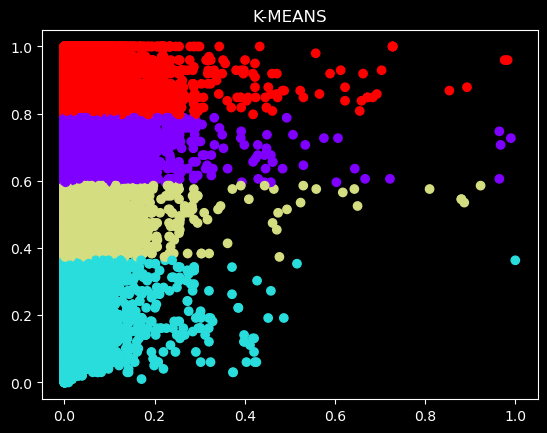

In [24]:
plt.scatter(mydata['Distance(mi)'],mydata['Humidity(%)'],c=machine.labels_,cmap='rainbow')
plt.title('K-MEANS')

In [25]:
mydata['Severity']=myVal

Text(0.5, 1.0, 'Original')

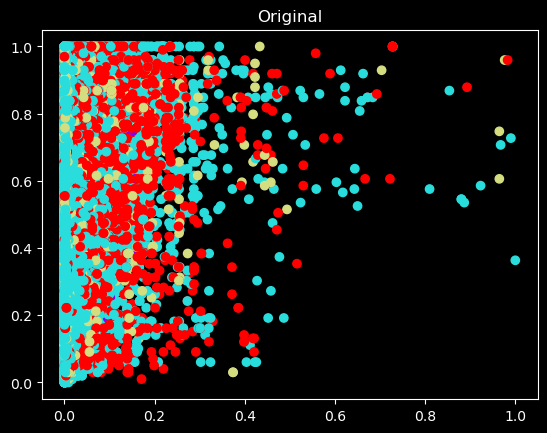

In [26]:
plt.scatter(mydata['Distance(mi)'],mydata['Humidity(%)'],c=mydata['Severity'],cmap='rainbow')
plt.title('Original')

#### DBSCAN

In [27]:
machine = DBSCAN(eps=0.3, min_samples=5)

In [28]:
mydata=mydata.drop('Severity',axis=1)

In [32]:
machine.fit(mydata) 
#this may cause a memory error if your system hasn't a good performance 
#try with a subset

MemoryError: 

In [30]:
DBlabels = machine.labels_

AttributeError: 'DBSCAN' object has no attribute 'labels_'

In [31]:
DBlabels

NameError: name 'DBlabels' is not defined

In [34]:
plt.scatter(mydata['Distance(mi)'],mydata['Humidity(%)'],c=DBlabels,cmap='rainbow')
plt.title('DB-SCAN')

NameError: name 'DBlabels' is not defined

In [35]:
matplotlib.pyplot.scatter(mydata['Visibility(mi)'],mydata['Distance(mi)'],c=DBlabels,cmap='rainbow')
matplotlib.pyplot.title('DB-SCAN')

NameError: name 'matplotlib' is not defined